In [1]:
%matplotlib inline
import numpy as np
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
import pandas as pd

import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from  tqdm import tqdm

In [2]:
import sys
sys.path.append("/home/egorcaa/учеба/QST/AAKat/libs")

In [3]:
import contextlib

@contextlib.contextmanager
def printoptions(*args, **kwargs):
    original = np.get_printoptions()
    np.set_printoptions(*args, **kwargs)
    try:
        yield
    finally: 
        np.set_printoptions(**original)


In [4]:
%load_ext autoreload
%autoreload 2

import qe_BS_DOS
import wannier_loader 

In [5]:

Ang2Bohr = 1.8897259886
Bohr2Ang = 1./Ang2Bohr


# QE

In [7]:
calc = qe_BS_DOS.qe_analyse_spinpolarized_3D('./', 'CrCl3')

efermi 5.91
Unit Cell Volume:   178.2848  (Ang^3)
alat 5.9587
Reciprocal-Space Vectors cart (Ang^-1)
[[ 1.0544379497  0.6088003464  0.3527076869]
 [-1.0544379497  0.6088003464 -0.3527076869]
 [ 0.           -0.            1.0836757288]]
alat 5.9587
Reciprocal-Space Vectors cart (2 pi / alat)
[[ 0.9999749768  0.5773550851  0.3344899158]
 [-0.9999749768  0.5773550851 -0.3344899158]
 [ 0.           -0.            1.0277025899]]
Real-Space Vectors cart (Ang)
[[ 2.9794002145  5.1603003714  0.          ]
 [-2.9794002145  5.1603003714  0.          ]
 [-1.9394313817  0.            5.79803085  ]]
Real-Space Vectors cart (alat)
[[ 0.5000125119  0.8660181799  0.          ]
 [-0.5000125119  0.8660181799  0.          ]
 [-0.3254816027  0.            0.9730441568]]


 positions cart (alat)
['Cr', 'Cr', 'Cl', 'Cl', 'Cl', 'Cl', 'Cl', 'Cl']
[[ 0.5000125119  1.1547486411  0.          ]
 [ 0.5000125119  0.5772877187  0.          ]
 [ 0.5294329334  0.            0.747706591 ]
 [ 0.1451104877  0.          

In [7]:
calc.get_qe_kpathBS()

3.4171
Γ
A
M
Y
G2
V2
G
F
H


In [8]:
calc.get_integer_kpath(N_points_direction=20, num_points_betweens=10)

Γ
A
M
Y
G2
V2
G
F
H


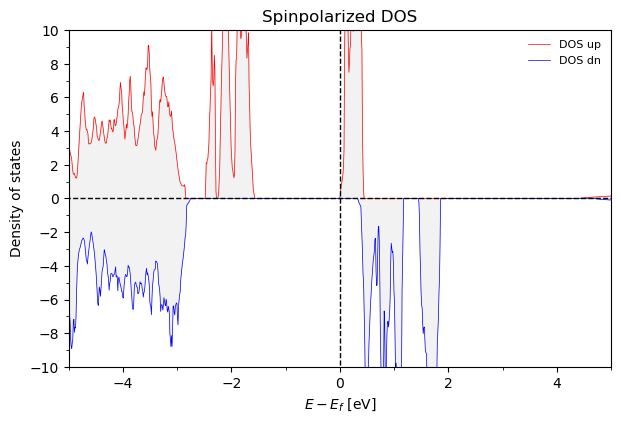

In [17]:
calc.plot_FullDOS()

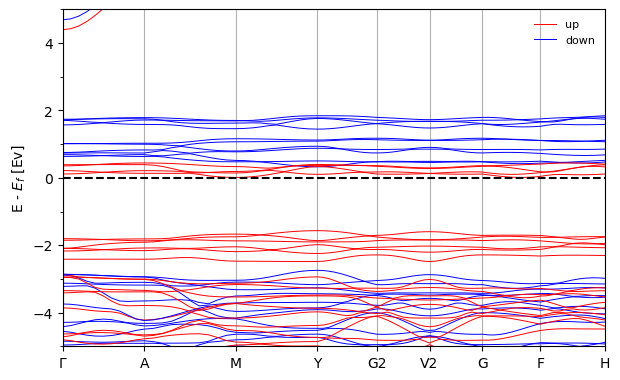

In [18]:
calc.plot_BS(efrom=-5, eto=5)

In [21]:
calc.print_bands_range(1, 50)

efermi 5.91
-------------SPIN UP---------------
band 2 eV from  -68.40 to  -68.40                 eV-eF from  -74.30 to  -74.30
band 3 eV from  -39.73 to  -39.73                 eV-eF from  -45.64 to  -45.64
band 4 eV from  -39.73 to  -39.73                 eV-eF from  -45.64 to  -45.63
band 5 eV from  -39.73 to  -39.73                 eV-eF from  -45.63 to  -45.63
band 6 eV from  -39.72 to  -39.72                 eV-eF from  -45.63 to  -45.63
band 7 eV from  -39.72 to  -39.72                 eV-eF from  -45.63 to  -45.62
band 8 eV from  -39.72 to  -39.71                 eV-eF from  -45.62 to  -45.62
band 9 eV from  -11.27 to  -10.64                 eV-eF from  -17.17 to  -16.54
band 10 eV from  -10.68 to  -10.24                 eV-eF from  -16.58 to  -16.15
band 11 eV from  -10.32 to  -10.13                 eV-eF from  -16.23 to  -16.04
band 12 eV from  -10.25 to  -10.10                 eV-eF from  -16.15 to  -16.01
band 13 eV from  -10.17 to  -10.06                 eV-eF from  -16.08

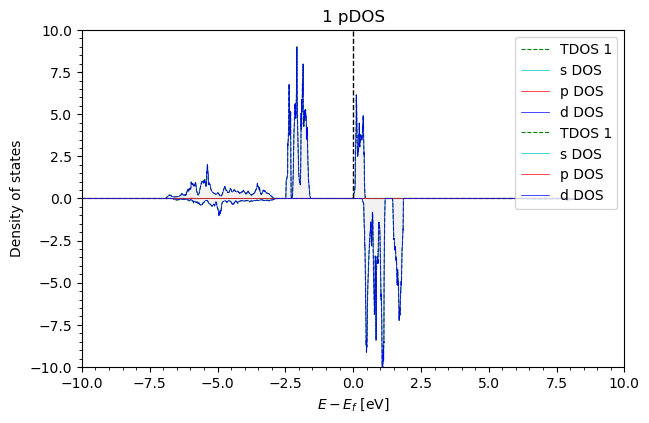

In [22]:
calc.get_pDOS()
calc.plot_pDOS('1', efrom=-10, eto=10, yfrom=-10)

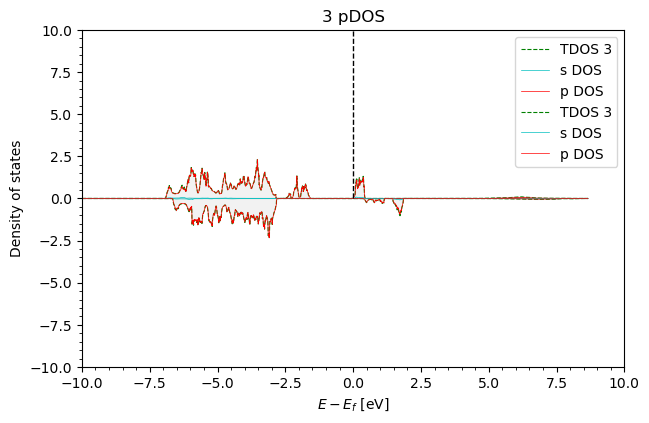

In [24]:
calc.plot_pDOS('3', efrom=-10, eto=10, yfrom=-10)

# Wannier bands

In [8]:
calc.load_wannier()

nwa  28
Rpts 8031
we have 3D hamiltonian
nwa  28
Rpts 8031
we have 3D hamiltonian


100%|██████████| 41/41 [00:04<00:00,  9.10it/s]


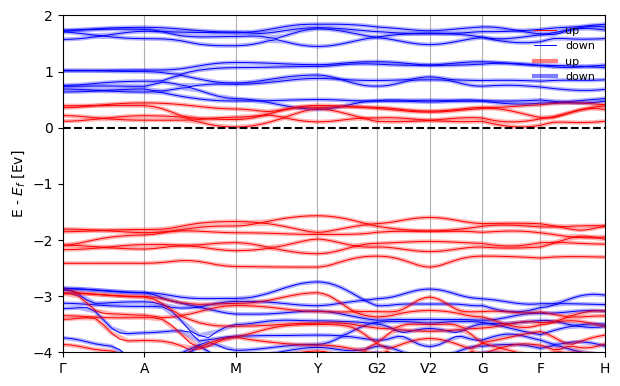

In [9]:
calc.plot_wannier_BS(efrom=-4, eto=2)

In [8]:
loader = wannier_loader.Wannier_loader_FM('./', 'CrCl3')
acell = np.linalg.norm(calc.acell[0])
b1 = calc.bcell[0] / (2. * np.pi / acell)  # First reciprocal lattice vector
b2 = calc.bcell[1] / (2. * np.pi / acell) # Second reciprocal lattice vector
b3 = calc.bcell[2] / (2. * np.pi / acell) # Second reciprocal lattice vector



nwa  28
Rpts 8031
we have 3D hamiltonian
nwa  28
Rpts 8031
we have 3D hamiltonian


In [55]:
klim = 1.0 
nkpt = 4

loader.get_dense_hk_symmetric(nkpt=nkpt, krange=klim)

  0%|          | 0/512 [00:00<?, ?it/s]

  5%|▌         | 28/512 [00:03<00:52,  9.24it/s]


KeyboardInterrupt: 

In [13]:
# loader.save_hk_pickle() #save it to file


In [15]:
loader.load_hk_pickle() #load it from file if exists
hks = np.transpose(loader.hks_spins, (3, 2, 0, 1))
hk_mn_up = hks[0] 
hk_mn_dn = hks[1] 


In [30]:
klim = 1.0 
nkpt = 10
# k cart (2 pi / alat)
coords = np.mgrid[-klim:klim:1.0/nkpt, -klim:klim:1.0/nkpt, -klim:klim:1.0/nkpt].reshape(3,-1).T # repr cart in 2 pi / alat
coords = np.array(coords)
kx_cart = coords[:, 0] 
ky_cart = coords[:, 1] 
kz_cart = coords[:, 2] 


B = np.array([b1, b2, b3]).T  # Reciprocal lattice basis
B_inv = np.linalg.inv(B)  # Inverse transformation

# k crystal
crystal_coords = np.dot(coords, B_inv.T)
kx_cryst = crystal_coords[:, 0] 
ky_cryst = crystal_coords[:, 1] 
kz_cryst = crystal_coords[:, 2] 


In [33]:
bs_spins = loader.get_hk_path(crystal_coords)
bsup = bs_spins[:, :, 0]

hello


100%|██████████| 8000/8000 [14:42<00:00,  9.07it/s]


In [34]:
import pickle 

with open('./wannier/bsup_path.pickle', 'wb') as f:
    pickle.dump(bs_spins, f)


In [24]:
import plotly.graph_objects as go


In [21]:
print(min(bsup[3]), max(bsup[3]))   

-0.15546463521077092 0.08750698889183389


In [34]:
bs_vals = np.real(band_str[:, 8] - np.mean(band_str[:, 8])) # 8th band


In [53]:
vv = bsup[1]
fig = go.Figure()

fig = go.Figure(data=go.Isosurface(
    x=kx_cart,
    y=ky_cart,
    z=kz_cart,
    value=vv,
    isomin=0.7*min(vv),
    isomax=0.7*max(vv),
    # surface_count=5, # number of isosurfaces, 2 by default: only min and max
    caps=dict(x_show=False, y_show=False)
    ))

vertices, ridges, _ = get_brillouin_zone_3d(calc.bcell/ (2. * np.pi / acell))

# Plot vertices
fig.add_trace(go.Scatter3d(
    x=vertices[:, 0], y=vertices[:, 1], z=vertices[:, 2],
    mode='markers',
    marker=dict(size=5, color='red'),
    name='Vertices',
    showlegend=False
))

# Plot edges
for ridge in ridges:
    # points = vertices[ridge]

    fig.add_trace(go.Scatter3d(
        x=ridge[:, 0], y=ridge[:, 1], z=ridge[:, 2],
        mode='lines',
        line=dict(color='black', width=2),
        name='Edges',
    showlegend=False
    ))

# Show figure
fig.update_layout(
    title='3D Brillouin Zone',
    scene=dict(
        xaxis_title='kx',
        yaxis_title='ky',
        zaxis_title='kz'
    )
)

fig.show()


# contour_trace = go.Contour(
#     z=z,
#     x=kx,
#     y=ky,
#     contours=dict(
#         start=0,
#         end=0,
#         size=0.1,
#         coloring='lines'
#     ),
#     showscale=False,
#     line=dict(width=2)
# )
# fig.add_trace(contour_trace)

In [42]:
def get_brillouin_zone_3d(cell):
    """
    Uses the k-space vectors and voronoi analysis to define
    the BZ of the system

    Args:
        cell: a 3x3 matrix defining the basis vectors in
        reciprocal space

    Returns:
        vor.vertices[bz_vertices]: vertices of BZ
        bz_ridges: edges of the BZ
        bz_facets: BZ facets

    """

    px, py, pz = np.tensordot(cell, np.mgrid[-1:2, -1:2, -1:2], axes=[0, 0])
    points = np.c_[px.ravel(), py.ravel(), pz.ravel()]

    from scipy.spatial import Voronoi

    vor = Voronoi(points)

    bz_facets = []
    bz_ridges = []
    bz_vertices = []

    for pid, rid in zip(vor.ridge_points, vor.ridge_vertices):

        if pid[0] == 13 or pid[1] == 13:
            bz_ridges.append(vor.vertices[np.r_[rid, [rid[0]]]])
            bz_facets.append(vor.vertices[rid])
            bz_vertices += rid

    bz_vertices = list(set(bz_vertices))

    return vor.vertices[bz_vertices], bz_ridges, bz_facets


vertices, ridges, _ = get_brillouin_zone_3d(calc.bcell)


In [54]:
def plot_brillouin_zone(cell):
    vertices, ridges, _ = get_brillouin_zone_3d(cell)
    
    # Create figure
    fig = go.Figure()
    
    # Plot vertices
    fig.add_trace(go.Scatter3d(
        x=vertices[:, 0], y=vertices[:, 1], z=vertices[:, 2],
        mode='markers',
        marker=dict(size=5, color='red'),
        name='Vertices'
    ))
    
    # Plot edges
    for ridge in ridges:
        # points = vertices[ridge]

        fig.add_trace(go.Scatter3d(
            x=ridge[:, 0], y=ridge[:, 1], z=ridge[:, 2],
            mode='lines',
            line=dict(color='black', width=2),
            name='Edges'
        ))
    
    # Show figure
    fig.update_layout(
        title='3D Brillouin Zone',
        scene=dict(
            xaxis_title='kx',
            yaxis_title='ky',
            zaxis_title='kz'
        )
    )
    
    fig.show()

# Example lattice basis (change this to your actual reciprocal lattice basis)
plot_brillouin_zone(calc.bcell)